In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TSForecasting.mage_calc import MageDataSet

In [2]:
#Extract Data
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/Hall/data_hall_raw.csv")
data = data[data['subjectId']=='1636-69-032']

In [3]:
data

,Display Time,GlucoseValue,subjectId
5464,2016-01-13 12:58:17,122,1636-69-032
5465,2016-01-13 13:03:17,123,1636-69-032
5466,2016-01-13 13:08:17,124,1636-69-032
5467,2016-01-13 13:13:17,128,1636-69-032
5468,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
7242,2016-01-19 17:12:49,101,1636-69-032
7243,2016-01-19 17:17:49,98,1636-69-032
7244,2016-01-19 17:22:49,101,1636-69-032
7245,2016-01-19 17:27:49,106,1636-69-032


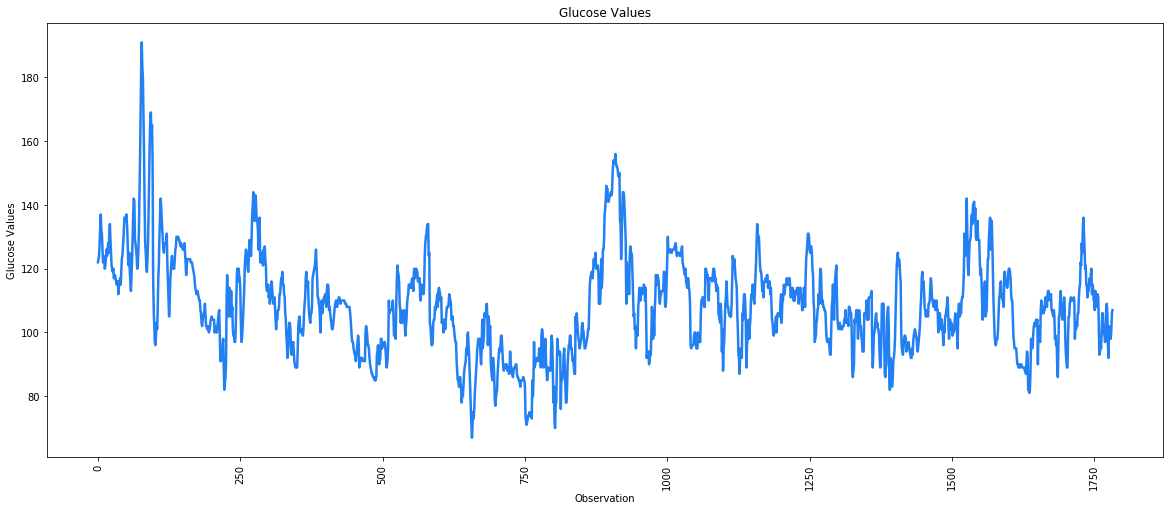

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(data['GlucoseValue'].tolist(), label='True', color='#2280f2', linewidth=2.5)
plt.title("Glucose Values")
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.xticks(rotation=90)
plt.show()

In [11]:
glucs = data['GlucoseValue'].to_list()
indices = [1*i for i in range(len(glucs))]
m = MageDataSet(indices, glucs)
k = m.getMAGE()

print(round(k,3))
    

29.623


In [6]:

series = data[data['subjectId']=='1636-69-032']
# Tail-rolling average transform
rolling = series.rolling(window=6)
rolling_mean = rolling.mean()
# print(rolling_mean.head(20))
# plot original and transformed dataset


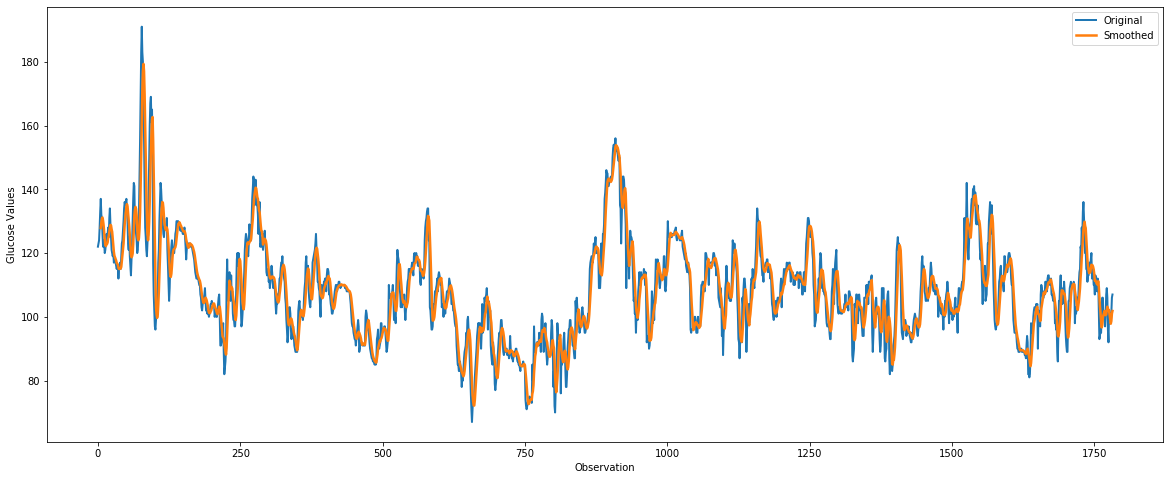

In [7]:
plt.figure(figsize=(20, 8))

plt.plot(series['GlucoseValue'].tolist(), label='Original', linewidth=2)
plt.plot(rolling_mean['GlucoseValue'].tolist(), label='Smoothed', linewidth=2.5)
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.legend()

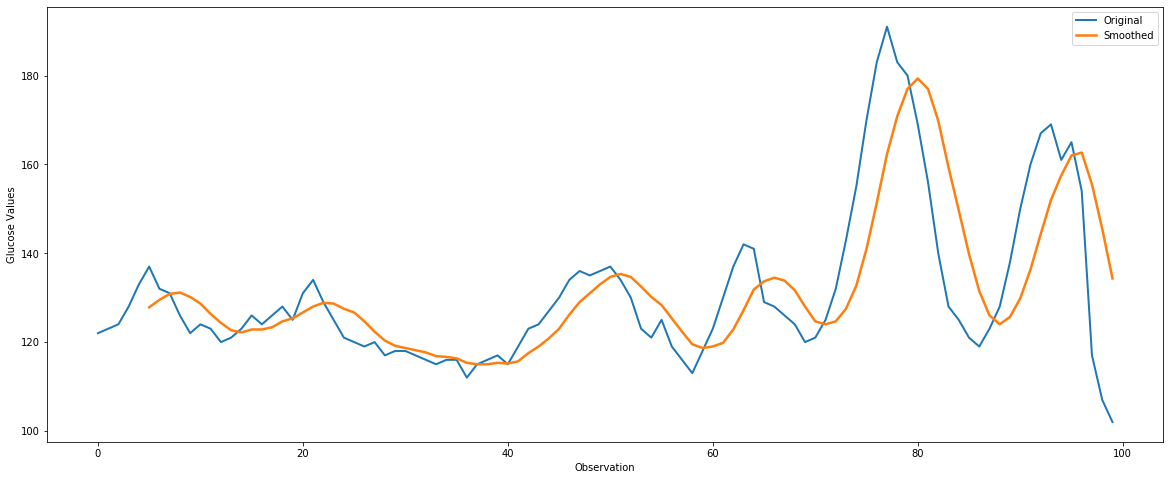

In [8]:
plt.figure(figsize=(20, 8))

plt.plot(series['GlucoseValue'][:100].tolist(), label='Original', linewidth=2)
plt.plot(rolling_mean['GlucoseValue'][:100].tolist(), label='Smoothed', linewidth=2.5)
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.legend()

In [10]:
glucs = rolling_mean['GlucoseValue'].to_list()
indices = [1*i for i in range(len(glucs))]
m = MageDataSet(indices, glucs)
k = m.getMAGE()

print(round(k,3))

25.226
